In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("Financial_Sample.xlsx")

In [3]:
 df.columns = df.columns.str.strip()

In [4]:
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,NaN,1618.5,3,20.0,32370.0,0.0,32370.0,16185.0,16185.0,2014-01-01,1,January,2014
1,Government,Germany,Carretera,NaN,1321.0,3,20.0,26420.0,0.0,26420.0,13210.0,13210.0,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,NaN,2178.0,3,15.0,32670.0,0.0,32670.0,21780.0,10890.0,2014-06-01,6,June,2014
3,Midmarket,Germany,Carretera,NaN,888.0,3,15.0,13320.0,0.0,13320.0,8880.0,4440.0,2014-06-01,6,June,2014
4,Midmarket,Mexico,Carretera,NaN,2470.0,3,15.0,37050.0,0.0,37050.0,24700.0,12350.0,2014-06-01,6,June,2014


In [5]:
df.shape

(700, 16)

In [6]:
df.isnull().sum()

Segment                 8
Country                11
Product                 8
Discount Band          62
Units Sold              5
Manufacturing Price     0
Sale Price              7
Gross Sales             5
Discounts               5
Sales                   0
COGS                    0
Profit                  0
Date                    0
Month Number            0
Month Name              0
Year                    0
dtype: int64

In [7]:
# Null dataset percentage
print("Missing Values Percentage :",round(df.isnull().sum().sum()/df.shape[0]*100,2),'%')

Missing Values Percentage : 15.86 %


# Getting categorical and Numerical column

In [8]:
categorical = df.select_dtypes(include = 'object').columns
display(categorical)
print("------------------")
numrical = df.select_dtypes(include = np.number).columns
display(numrical)

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Month Name'], dtype='object')

------------------


Index(['Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales',
       'Discounts', 'Sales', 'COGS', 'Profit', 'Month Number', 'Year'],
      dtype='object')

# Repair the dataset

In [9]:
# Obejects Column in Dataset
objects = list(df.select_dtypes(include='object').columns)
objects

['Segment', 'Country', 'Product', 'Discount Band', 'Month Name']

In [10]:
df.select_dtypes(include='object').isnull().sum()


Segment           8
Country          11
Product           8
Discount Band    62
Month Name        0
dtype: int64

In [11]:
# Fill Null values or replace all the null values of dataset by the mode value.
for col in objects:
    df[col] = df[col].fillna(value=df[col].mode()[0])

In [12]:
df.select_dtypes(include='object').isnull().sum()

Segment          0
Country          0
Product          0
Discount Band    0
Month Name       0
dtype: int64

# Filling categorical with mode and numerical with mean.

In [13]:
for col in categorical:
    df[col] = df[col].fillna(value=df[col].mode()[0])

In [14]:
df.isnull().sum()

Segment                0
Country                0
Product                0
Discount Band          0
Units Sold             5
Manufacturing Price    0
Sale Price             7
Gross Sales            5
Discounts              5
Sales                  0
COGS                   0
Profit                 0
Date                   0
Month Number           0
Month Name             0
Year                   0
dtype: int64

In [15]:
# Null dataset percentage
print("Missing Values Percentage :",round(df.isnull().sum().sum()/df.shape[0]*100,2),'%')

Missing Values Percentage : 3.14 %


In [16]:
# Numerical Dataset (int)
ints = df.select_dtypes(include=int).columns
ints

Index(['Manufacturing Price', 'Month Number', 'Year'], dtype='object')

In [17]:
df.select_dtypes(include=int).isnull().sum()

Manufacturing Price    0
Month Number           0
Year                   0
dtype: int64

In [18]:
print("Total Profit : ", round(df.Profit.sum(),2))

Total Profit :  16893702.26


In [19]:
# Numerical Dataset (float)
floats = list(df.select_dtypes(include=float).columns)
floats

['Units Sold',
 'Sale Price',
 'Gross Sales',
 'Discounts',
 'Sales',
 'COGS',
 'Profit']

In [20]:
df.select_dtypes(include=float).isnull().sum()

Units Sold     5
Sale Price     7
Gross Sales    5
Discounts      5
Sales          0
COGS           0
Profit         0
dtype: int64

In [21]:
# Fill or replace all null values with the mean (average value of the column)
for col in floats:
    df[col] = df[col].fillna(value=df[col].mean())

In [22]:
df.select_dtypes(include=float).isnull().sum()

Units Sold     0
Sale Price     0
Gross Sales    0
Discounts      0
Sales          0
COGS           0
Profit         0
dtype: int64

***there is no null value laft***

In [23]:
# All Dataset is cleaned
df.isnull().sum()

Segment                0
Country                0
Product                0
Discount Band          0
Units Sold             0
Manufacturing Price    0
Sale Price             0
Gross Sales            0
Discounts              0
Sales                  0
COGS                   0
Profit                 0
Date                   0
Month Number           0
Month Name             0
Year                   0
dtype: int64

# Segments

In [24]:
print(df.Segment.unique())
print("Total segment : ", len(df.Segment.unique()))

['Government' 'Midmarket' 'Channel Partners' 'Enterprise' 'Small Business']
Total segment :  5


In [38]:
# Profit by Segment
pbs = df.groupby(['Segment']).agg({'Profit':'sum'}).reset_index()
pbs.Profit = pbs.Profit/100000
pbs

,Segment,Profit
0,Channel Partners,12.908083
1,Enterprise,-6.145456
2,Government,114.141681
3,Midmarket,6.601031
4,Small Business,41.431685


In [39]:
df.Country.unique()

array(['CAN', 'GER', 'FRA', 'MEX', 'USA'], dtype=object)

In [40]:
# Converting all Countries name into 3 letters and in upper case
df.Country = df.Country.map(lambda val : 'USA' if val=='United States of America' else val[0:3].upper())
df.Country.unique()

array(['CAN', 'GER', 'FRA', 'MEX', 'USA'], dtype=object)

In [41]:
total_sales = df['Sales'].sum()
print(total_sales)

118726350.25999999


In [32]:
pn = (df.groupby(['Country'])
       .agg({'Sales':'sum', 'Profit':'sum'})
       .reset_index()
      )
pn

,Country,Sales,Profit
0,CAN,2.400017e+07,3359437.935
1,FRA,2.711725e+07,4297445.980
2,GER,2.290578e+07,3624167.730
3,MEX,2.084595e+07,2889313.870
4,USA,2.385720e+07,2723336.745


In [42]:
# Selecting color for plot
color1 = []
color2 = []
for val in df['Profit']:
    if val>0:
        color1.append('lightgreen')
    else:
        color1.append('red')
        
for val in df['Profit']:
    if val>0:
        color2.append('skyblue')
    else:
        color2.append('red')

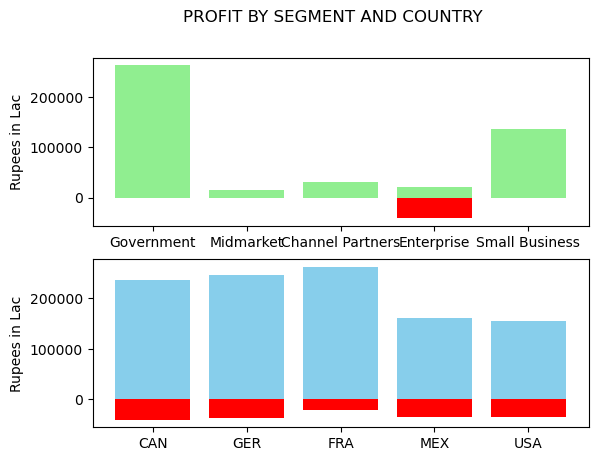

In [37]:
# A Plot on Profit by Segment and Country
plt.subplot(2,1,1)
plt.bar(df['Segment'],df['Profit'],color=color1)
plt.ylabel('Rupees in Lac')
plt.subplot(2,1,2)
plt.bar(df['Country'],df['Profit'],color=color2)
plt.ylabel("Rupees in Lac")
plt.suptitle("PROFIT BY SEGMENT AND COUNTRY")
plt.show()

In [44]:
# Sales By Product
sbp = df.groupby(['Product']).agg({'Sales':'sum'}).reset_index()
sbp['Sales'] = sbp['Sales']/10000000
sbp

,Product,Sales
0,Amarilla,1.640623
1,Carretera,1.323326
2,Montana,1.539080
3,Paseo,3.600527
4,VTT,1.968432
5,Velo,1.800647


In [45]:
# Selecting color for sales
color1 = []
for val in sbp['Sales']:
    if val>sbp['Sales'].mean():
        color1.append('green')
    else:
        color1.append('lightgreen')

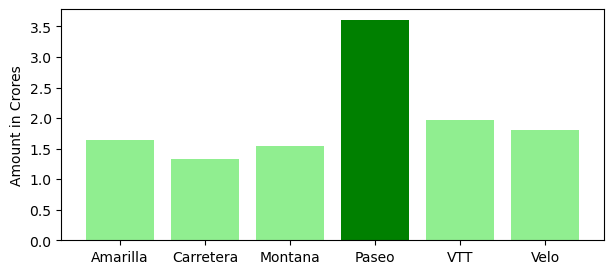

In [46]:
# Plot to show sales by Product
plt.figure(figsize=(7,3))
plt.bar(sbp['Product'],sbp['Sales'],color=color1)
plt.ylabel('Amount in Crores')
plt.show()

In [ ]:
df.head(2)

In [47]:
# Calculating the gross sales of everymonth
gsbm = df.groupby(['Date']).agg({'Gross Sales':'sum'}).reset_index()
gsbm['Gross Sales']=round(gsbm['Gross Sales']/1000000,2)
gsbm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         16 non-null     datetime64[ns]
 1   Gross Sales  16 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 388.0 bytes


In [ ]:
gsbm.Date = gsbm.Date.map(lambda val : str(val)[0:7])

In [ ]:
gsbm.info()

In [ ]:
gsbm.head(2)

In [ ]:
labels = []
for i in range(len(gsbm['Date'])):
    labels.append(gsbm['Date'][i]+"-:-"+str(gsbm['Gross Sales'][i])+"M")

In [ ]:
plt.pie(gsbm['Gross Sales'],labels=labels)
plt.show()